# Cas Kaggle
**Dataset:** Android Permission Dataset

Alberto Romero Cabezas

## Llibreries utilitzades

In [37]:
import numpy as np
import pandas as pd
%matplotlib notebook
%matplotlib inline
from matplotlib import pyplot as plt
import scipy.stats
import seaborn as sns
import plotly
import plotly.offline as py
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import roc_curve  
from sklearn.metrics import auc  
from sklearn import preprocessing
from sklearn.metrics import plot_confusion_matrix

## Anàlisis dels atributs i preprocessament

In [38]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

dataset = load_dataset('../data/Android_Permission.csv')

dataset.shape

(29999, 184)

In [39]:
dataset.head()

,App,Package,Category,Description,Rating,Number of ratings,Price,Related apps,Dangerous permissions count,Safe permissions count,...,Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S),Class
0,Canada Post Corporation,com.canadapost.android,Business,Canada Post Mobile App gives you access to som...,3.100,77,0.000,"{com.adaffix.pub.ca.android, com.kevinquan.gas...",7.000,1,...,0,1,0,0,0,0,0,1,0,0
1,Word Farm,com.realcasualgames.words,Brain & Puzzle,Speed and strategy combine in this exciting wo...,4.300,199,0.000,"{air.com.zubawing.FastWordLite, com.joybits.do...",3.000,2,...,0,0,0,0,0,0,0,0,0,0
2,Fortunes of War FREE,fortunesofwar.free,Cards & Casino,"Fortunes of War is a fast-paced, easy to learn...",4.100,243,0.000,"{com.kevinquan.condado, hu.monsta.pazaak, net....",1.000,1,...,0,0,0,0,0,0,0,0,0,0
3,Better Keyboard: Avatar Purple,com.cc.betterkeyboard.skins.avatarpurple,Libraries & Demo,Skin for Better Keyboard featuring a glossy fe...,3.600,2589,0.000,{eu.gdumoulin.betterandroid.skins.transparent....,0.000,0,...,0,0,0,0,0,0,0,0,0,0
4,Boxing Day,indiaNIC.android.BoxingDay,Lifestyle,Boxing Day by Christopher Jaymes<p>Based on a ...,0.000,0,5.990,NaN,1.000,0,...,0,0,0,0,0,0,0,0,0,1


In [40]:
dataset.columns

Index(['App', 'Package', 'Category', 'Description', 'Rating',
       'Number of ratings', 'Price', 'Related apps',
       'Dangerous permissions count', 'Safe permissions count',
       ...
       'Your personal information : read calendar events (D)',
       'Your personal information : read contact data (D)',
       'Your personal information : read sensitive log data (D)',
       'Your personal information : read user defined dictionary (D)',
       'Your personal information : retrieve system internal state (S)',
       'Your personal information : set alarm in alarm clock (S)',
       'Your personal information : write Browser's history and bookmarks (D)',
       'Your personal information : write contact data (D)',
       'Your personal information : write to user defined dictionary (S)',
       'Class'],
      dtype='object', length=184)

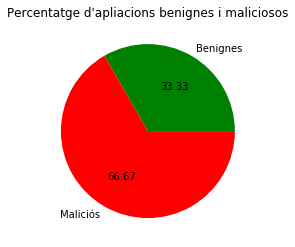

In [41]:
suma = dataset.App.groupby(dataset['Class']).count()
plt.figure()
plt.title("Percentatge d'apliacions benignes i maliciosos")
pie_class=plt.pie(suma, labels=['Benignes','Maliciós'],colors=['Green','Red'], autopct='%.2f')

In [42]:
label_encoder = preprocessing.LabelEncoder()
dataset_copia = dataset.copy()
dataset['Category'] = label_encoder.fit_transform(dataset['Category'])
dataset['Package'] = label_encoder.fit_transform(dataset['Package'])

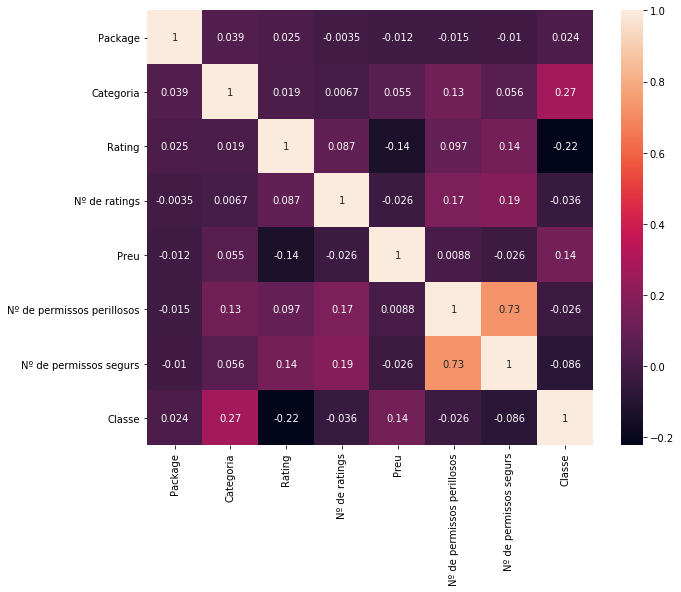

In [43]:
Paquet = dataset['Package']
Categoria = dataset['Category']
Rating = dataset['Rating']
Num_Ratings = dataset['Number of ratings']
Preu = dataset['Price']
Num_Permissos_Perillosos = dataset['Dangerous permissions count']
Num_Permissos_Segurs = dataset['Safe permissions count']
Classe = dataset['Class']
Variables = pd.DataFrame(list(zip(Paquet, Categoria, Rating, Num_Ratings, Preu, Num_Permissos_Perillosos, Num_Permissos_Segurs, Classe)), 
columns=['Package','Categoria', 'Rating', 'Nº de ratings', 'Preu', 'Nº de permissos perillosos', 'Nº de permissos segurs', 'Classe'])
plt.figure(figsize=(10,8))
p = sns.heatmap(Variables.corr(), annot=True)

In [44]:
Benigne = go.Box(
    y=(dataset['Dangerous permissions count'][dataset.Class==0]),
    name = 'Benigne',
    marker = dict(
        color = 'rgb(0,150,0)',
    )
)

Malicios = go.Box(
    y=(dataset['Dangerous permissions count'][dataset.Class==1]),
    name = 'Maliciós',
    marker = dict(
        color = 'rgb(150,0,0)',
    )
)

layout = go.Layout(
    title = "Nº de permissos perillosos",
    yaxis= {'title': 'Nº de permissos perillosos'}
)

data = [Benigne, Malicios]
py.iplot({'data': data, 'layout': layout})

In [45]:
Benigne = go.Box(
    y=(dataset['Safe permissions count'][dataset.Class==0]),
    name = 'Benigne',
    marker = dict(
        color = 'rgb(0,150,0)',
    )
)

Malicios = go.Box(
    y=(dataset['Safe permissions count'][dataset.Class==1]),
    name = 'Maliciós',
    marker = dict(
        color = 'rgb(150,0,0)',
    )
)

layout = go.Layout(
    title = "Nº de permissos segurs",
    yaxis= {'title': 'Nº de permissos segurs'}
)

data = [Benigne, Malicios]
py.iplot({'data': data, 'layout': layout})

In [46]:
Benigne = go.Box(
    y=(dataset['Rating'][dataset.Class==0]),
    name = 'Benigne',
    marker = dict(
        color = 'rgb(0,150,0)',
    )
)

Malicios = go.Box(
    y=(dataset['Rating'][dataset.Class==1]),
    name = 'Maliciós',
    marker = dict(
        color = 'rgb(150,0,0)',
    )
)

layout = go.Layout(
    title = "Relació del rating amb la classe de l'aplicació",
    yaxis= {'title': "Relació del rating amb la classe de l'aplicació"}
)
            
data = [Benigne, Malicios]
py.iplot({'data': data, 'layout': layout})

In [47]:
suma_malicios = dataset_copia.Class.groupby(dataset_copia['Category'][dataset_copia.Class==1]).count()
suma_malicios

Category
Arcade & Action      1190
Books & Reference    1421
Brain & Puzzle       1191
Business              424
Cards & Casino        283
Casual                818
Comics                 78
Communication         527
Education             796
Entertainment        2204
Finance               516
Health & Fitness      506
Libraries & Demo      103
Lifestyle             881
Media & Video         372
Medical               267
Music & Audio         467
News & Magazines      444
Personalization      1036
Photography           263
Productivity          580
Racing                208
Shopping              369
Social                330
Sports                609
Sports Games          252
Tools                1175
Transportation        430
Travel & Local       2121
Weather               139
Name: Class, dtype: int64

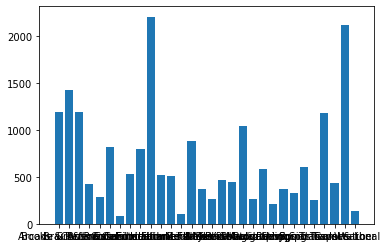

In [48]:
plt.figure()
plt.bar(suma_malicios.index,suma_malicios)
plt.show()

In [49]:
suma_benigne = dataset_copia.Class.groupby(dataset_copia['Category'][dataset_copia.Class==0]).count()
suma_benigne

Category
Arcade & Action      769
Books & Reference    538
Brain & Puzzle       682
Business             521
Cards & Casino       598
Casual               860
Comics               507
Communication        576
Education            509
Entertainment        623
Finance              529
Health & Fitness     532
Libraries & Demo     508
Lifestyle            554
Media & Video        410
Medical                3
Music & Audio         86
News & Magazines      36
Personalization      491
Photography           34
Productivity         115
Racing                80
Shopping              32
Social                69
Sports                23
Sports Games          89
Tools                154
Transportation         4
Travel & Local        33
Weather               34
Name: Class, dtype: int64

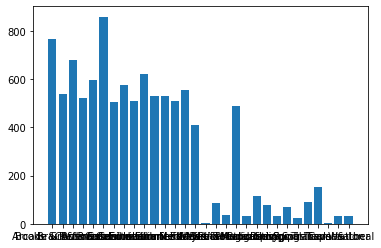

In [50]:
plt.figure()
plt.bar(suma_benigne.index,suma_benigne)
plt.show()

In [51]:
suma_malicios = dataset_copia.Class.groupby(dataset_copia['Package'][dataset_copia.Class==1]).count().sort_values()
suma_malicios

Package
Adam.androiddev                             1
com.slovoed.noreg.english_turkish.deluxe    1
com.slovoed.noreg.german_turkish.classic    1
com.slovoed.noreg.pons.german_turkish       1
com.slowtimedesign.morisumaki               1
                                           ..
com.google.earth                            7
com.audioguidia.worldexplorer360en          7
com.glu.android.skob2_free                  7
com.vznavigator.ADR6300                     7
com.shazam.android                          8
Name: Class, Length: 16582, dtype: int64

In [52]:
suma_beninge = dataset_copia.Class.groupby(dataset_copia['Package'][dataset_copia.Class==0]).count().sort_values()
suma_beninge

Package
AKnght.Studios.Kids.ABCLite            1
com.sg.android.childpuzzle.animal      1
com.sexpositions.textwin               1
com.sevenspider.cheezburger            1
com.sevenleaf.spookysounds             1
                                      ..
com.mw.slotsroyale                     4
com.mouseandroidgames.unblock          4
com.fruits.games                       4
com.kiwifruitmobile.solitaire          4
com.finddifferences.finddifferences    4
Name: Class, Length: 8830, dtype: int64

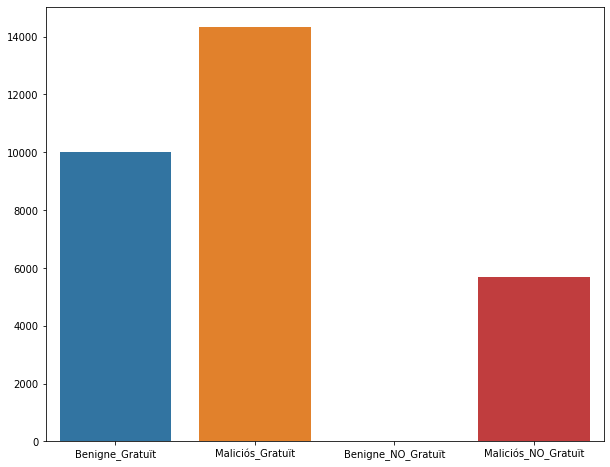

In [53]:
data = {'Benigne_Gratuït': [len(dataset[(dataset['Price']==0) & (dataset['Class']==0)])], 
     'Maliciós_Gratuït': [len(dataset[(dataset['Price']==0) & (dataset['Class']==1)])],
     'Benigne_NO_Gratuït': [len(dataset[(dataset['Price']>0) & (dataset['Class']==0)])],
     'Maliciós_NO_Gratuït': [len(dataset[(dataset['Price']>0) & (dataset['Class']==1)])]}

preu = pd.DataFrame(data)
plt.figure(figsize=(10,8))
sns.barplot(data=preu)

In [54]:
dataset.isnull().sum()

App                                                                      1
Package                                                                  0
Category                                                                 0
Description                                                              3
Rating                                                                   0
                                                                        ..
Your personal information : set alarm in alarm clock (S)                 0
Your personal information : write Browser's history and bookmarks (D)    0
Your personal information : write contact data (D)                       0
Your personal information : write to user defined dictionary (S)         0
Class                                                                    0
Length: 184, dtype: int64

In [55]:
# dataset = dataset.dropna()

In [56]:
# dataset.shape

In [57]:
# y = dataset['Class']
# x = dataset [['Price','Package', 'Category','Rating']]
# Y = y.values.reshape(1, -1)
# X = x.values

In [58]:
exec(open("../src/generate_features.py").read())

## Model training, testing and evaluation

In [59]:
exec(open("../src/train_model.py").read())

In [60]:
exec(open("../src/score_model.py").read())

## Model Evaluation

Gradient Boosting Classifier

              precision    recall  f1-score   support

           0       0.65      0.74      0.69      1972
           1       0.86      0.80      0.83      3876

    accuracy                           0.78      5848
   macro avg       0.76      0.77      0.76      5848
weighted avg       0.79      0.78      0.78      5848



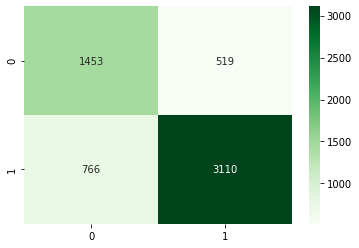

In [61]:
print(cr_gbc)
# mat_gbc.plot()
sns.heatmap(con_mat_gbc, annot=True, fmt='.4g', cmap='Greens')
plt.show()

Ridge Classifier

              precision    recall  f1-score   support

           0       0.51      0.26      0.35      1972
           1       0.70      0.87      0.77      3876

    accuracy                           0.66      5848
   macro avg       0.60      0.57      0.56      5848
weighted avg       0.63      0.66      0.63      5848



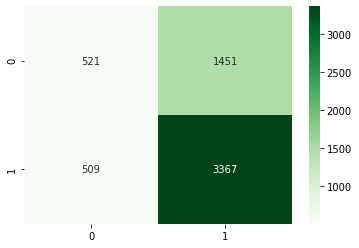

In [62]:
print(cr_rc)
# mat_rc.plot()
sns.heatmap(con_mat_rc, annot=True, fmt='.4g', cmap='Greens')
plt.show()

Gaussian Naive Bayes

              precision    recall  f1-score   support

           0       0.46      0.98      0.63      1972
           1       0.98      0.41      0.58      3876

    accuracy                           0.60      5848
   macro avg       0.72      0.70      0.60      5848
weighted avg       0.80      0.60      0.60      5848



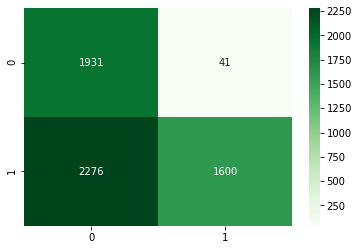

In [63]:
print(cr_gnb)
# mat_gnb.plot()
sns.heatmap(con_mat_gnb, annot=True, fmt='.4g', cmap='Greens')
plt.show()

Random Forest Classifier

              precision    recall  f1-score   support

           0       0.62      0.62      0.62      1972
           1       0.81      0.81      0.81      3876

    accuracy                           0.75      5848
   macro avg       0.71      0.71      0.71      5848
weighted avg       0.74      0.75      0.74      5848



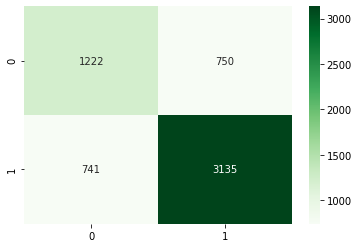

In [64]:
print(cr_rfc)
# mat_rfc.plot()
sns.heatmap(con_mat_rfc, annot=True, fmt='.4g', cmap='Greens')
plt.show()